<a href="https://colab.research.google.com/github/abdulsamadkhan/MachineLearningTutorials/blob/main/RegressionDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [12]:
# number of features
data.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [14]:
# Feature names in the dataset
feature_names = data.feature_names
print("Features in the dataset:", feature_names)

Features in the dataset: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


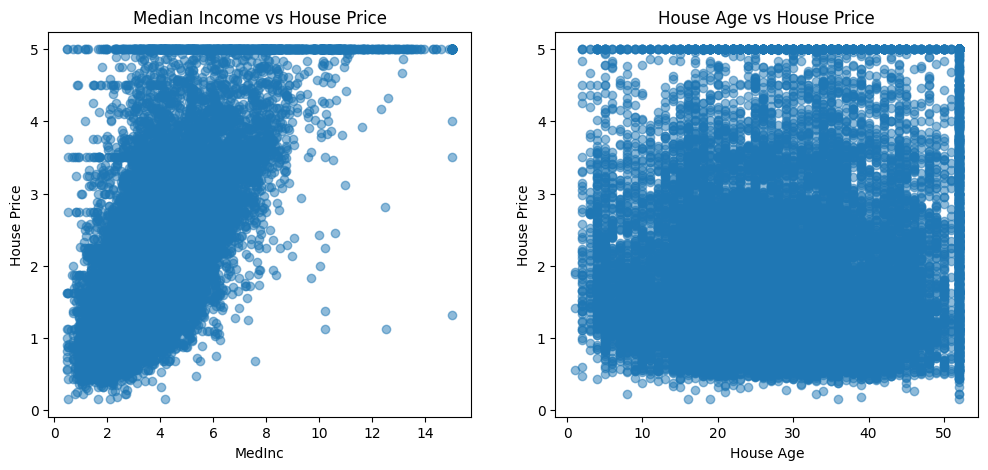

In [13]:
# Visualize the first two features against the target
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, alpha=0.5)
plt.xlabel("MedInc")
plt.ylabel("House Price")
plt.title("Median Income vs House Price")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, alpha=0.5)
plt.xlabel("House Age")
plt.ylabel("House Price")
plt.title("House Age vs House Price")
plt.show()

In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [17]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()  # Create a StandardScaler instance
X_train = scaler.fit_transform(X_train)  # Compute mean & std from training data and transform it
X_test = scaler.transform(X_test)  # Use the same transformation on test data

In [18]:
X_train[0]

array([-0.07682694,  0.58294754,  0.38114543,  0.23072258, -0.18709651,
       -0.00128351,  1.1133097 , -1.24187193])

In [23]:
y_train.shape

torch.Size([16512, 1])

In [22]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [24]:
# Define a simple neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [25]:
model = NeuralNetwork()


In [26]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [27]:
# Training loop
num_epochs = 100
train_losses = []
val_losses = []

In [28]:
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear previous gradients to prevent accumulation
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()  # Compute gradients for backpropagation
    optimizer.step()  # Update model parameters
    train_losses.append(loss.item())

    # Validation loss
    model.eval()  # Set the model to evaluation mode (disables dropout/batchnorm effects)
    with torch.no_grad():  # Disable gradient computation to save memory and speed up evaluation
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_losses.append(val_loss.item())

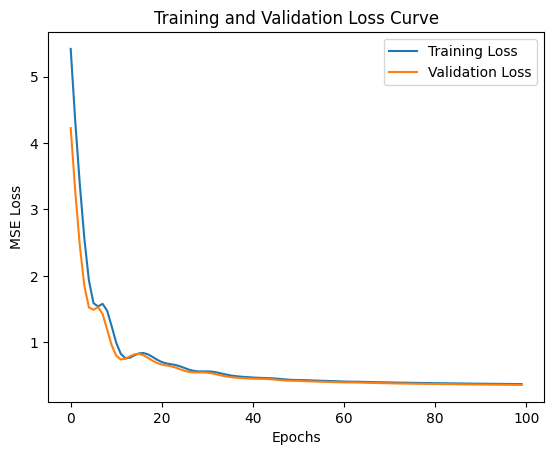

In [29]:
# Plot training and validation loss
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training and Validation Loss Curve")
plt.show()